In [6]:
#Task 2 - Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset
df = pd.read_csv('../Data/data.csv')

# 1. Overview of the Data
print("Data Shape", df.shape)
print("Data Types:", df.dtypes)











Data Shape (95662, 16)
Data Types: TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [7]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [8]:
# 2. Summary Statistics
print(df.describe())

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


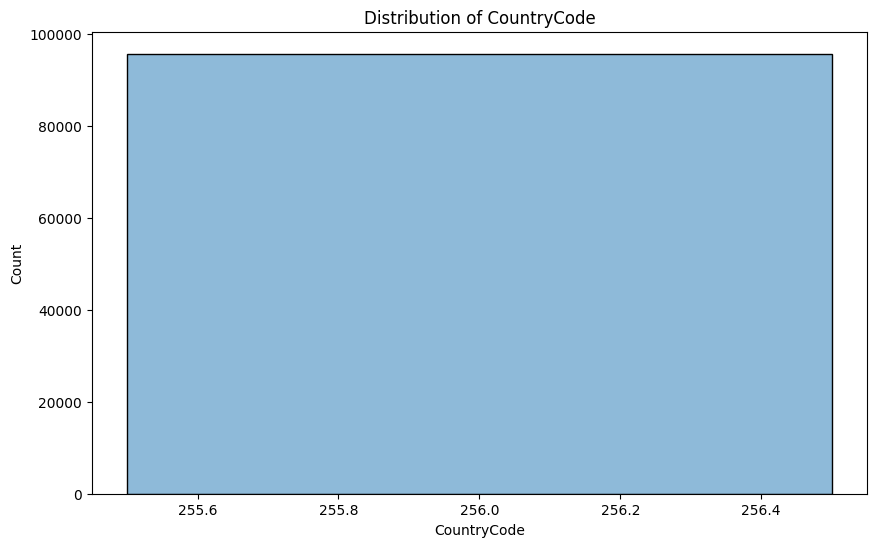

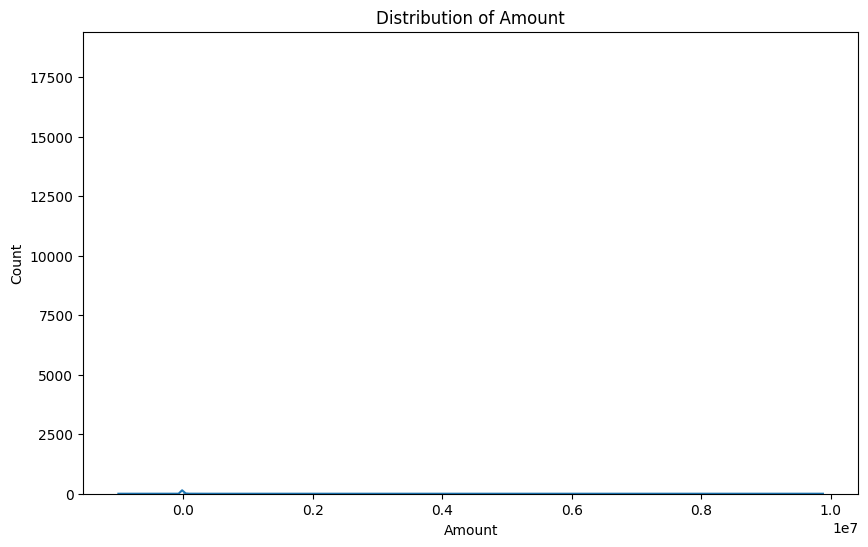

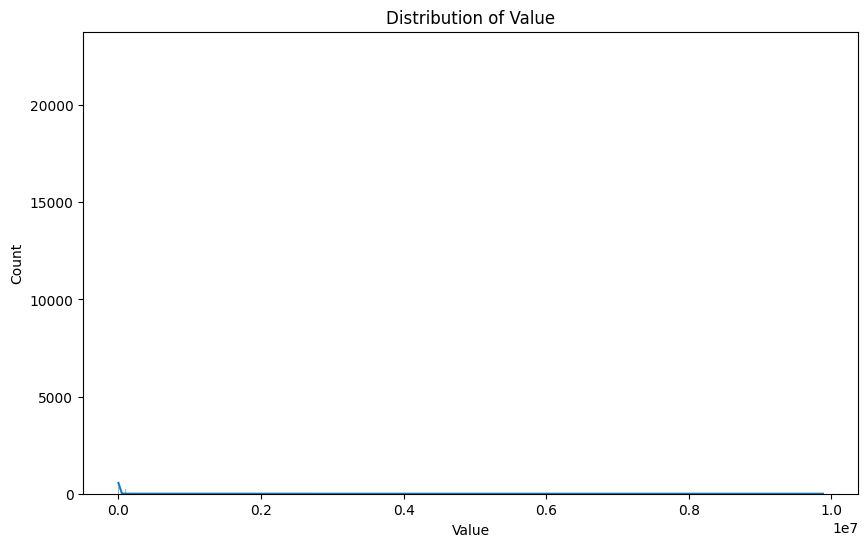

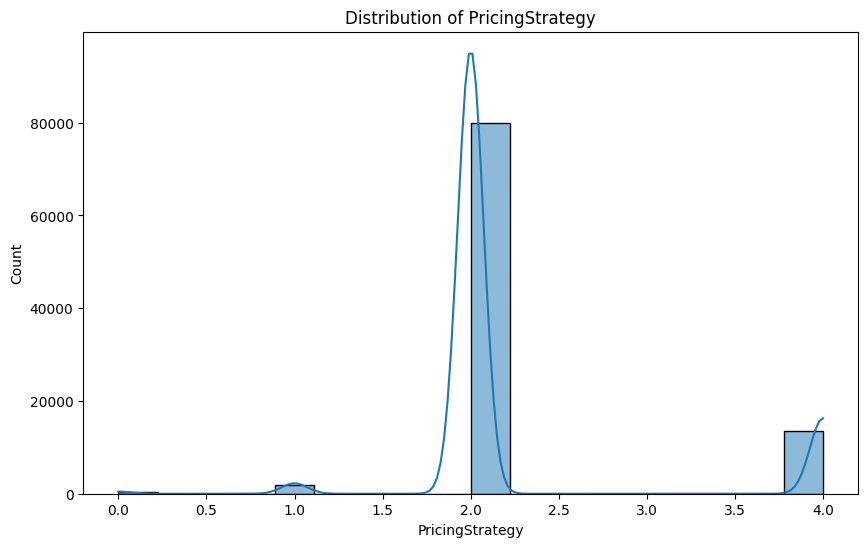

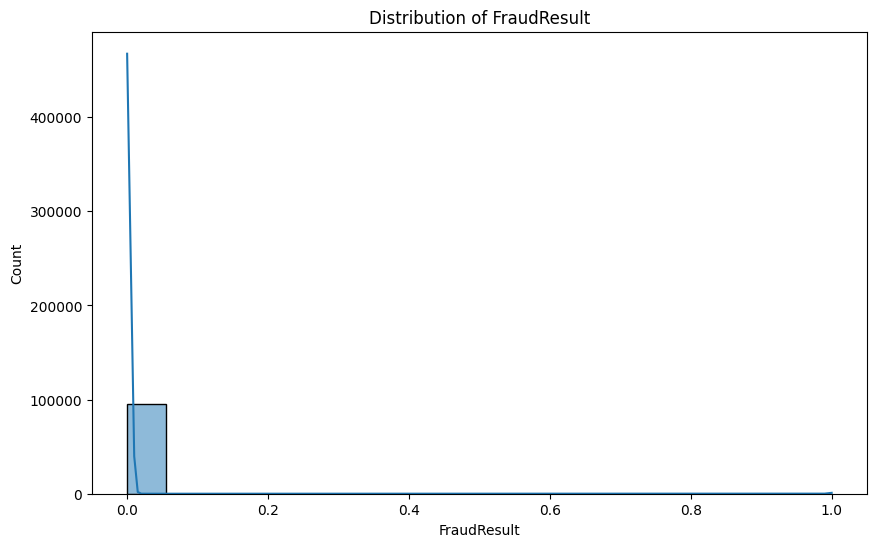

In [9]:
# 3. Distribution of Numerical Features
numerical_features = df.select_dtypes(include=[np.number]).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

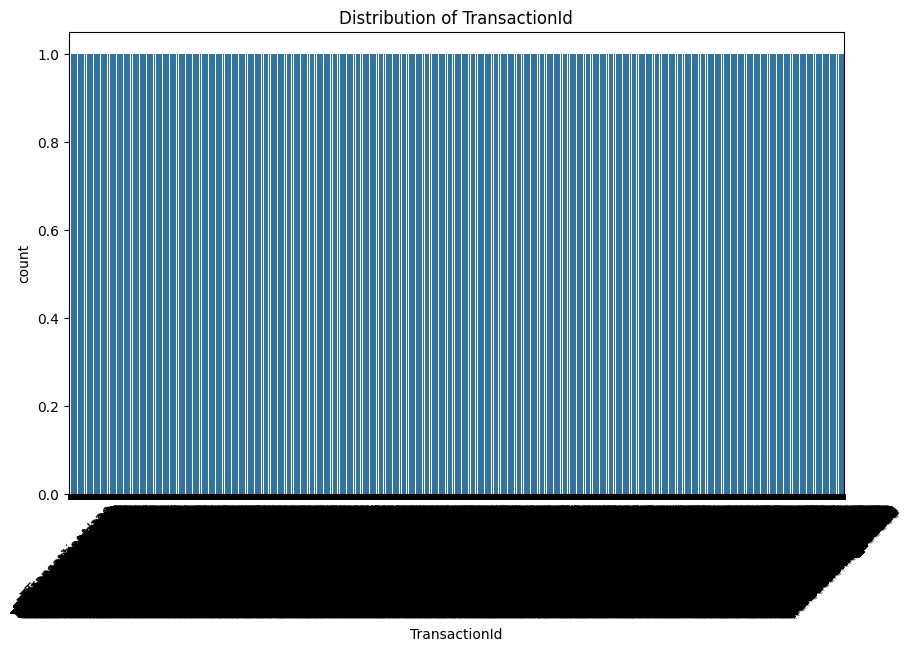

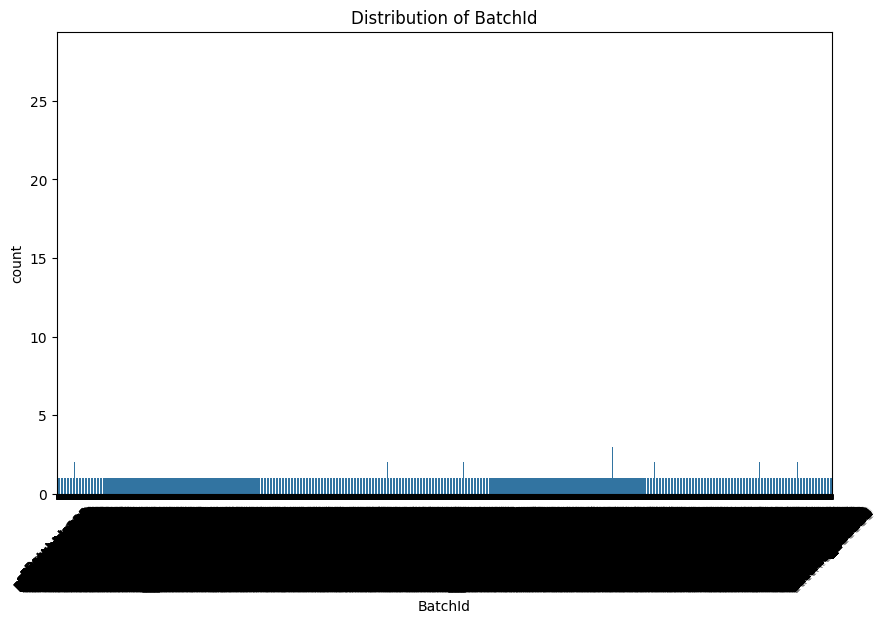

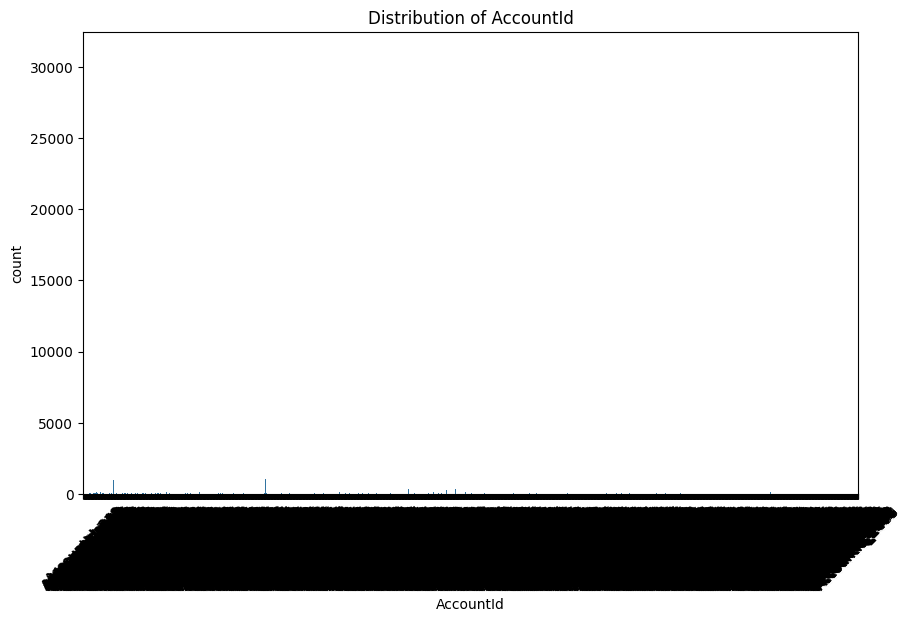

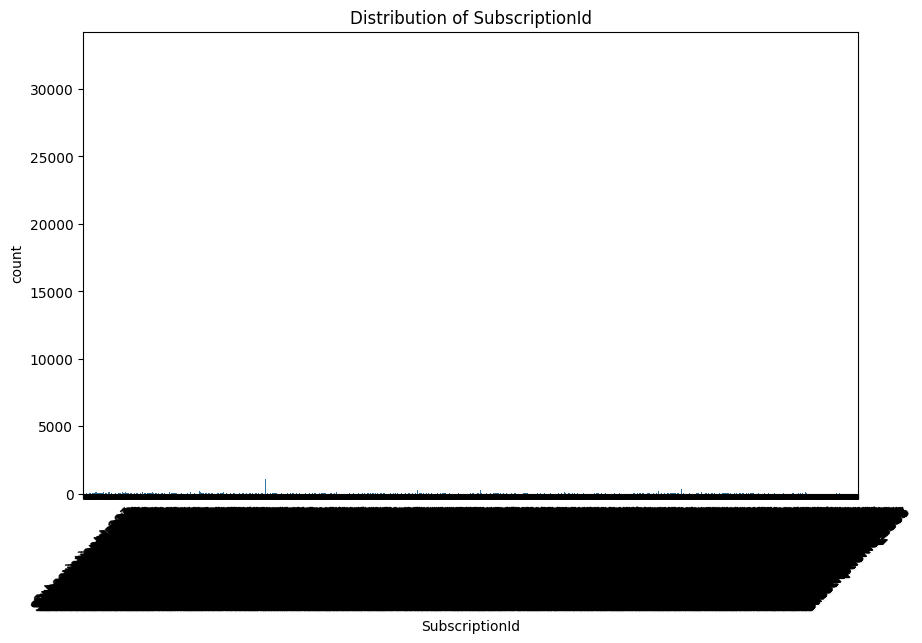

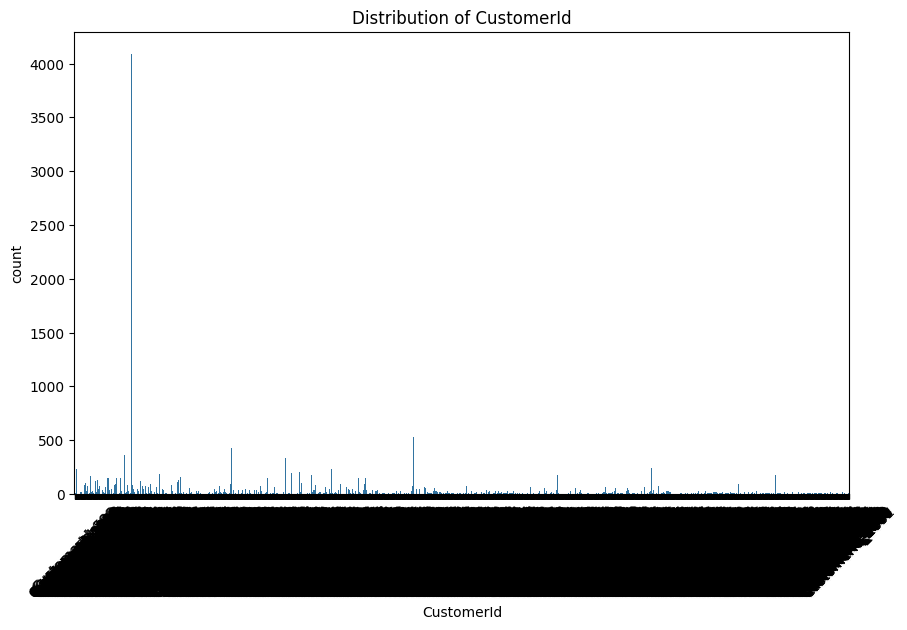

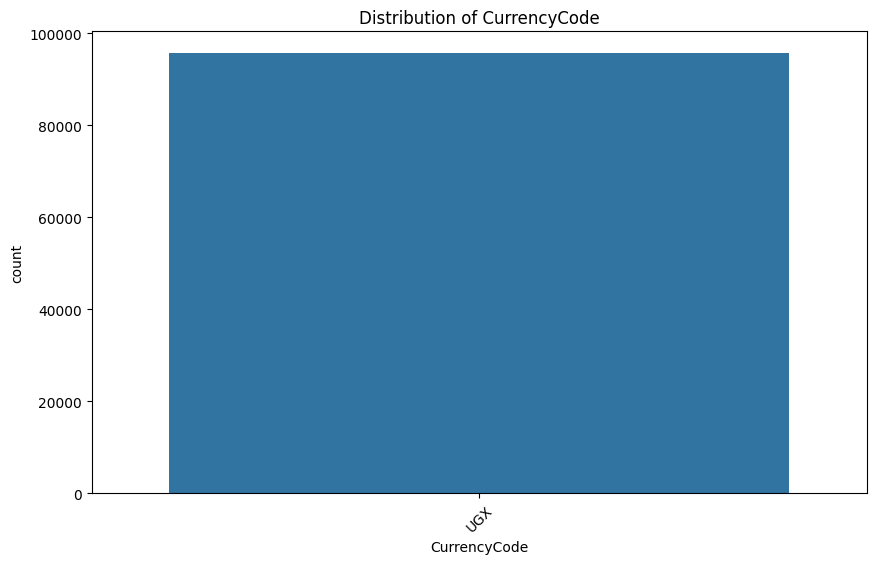

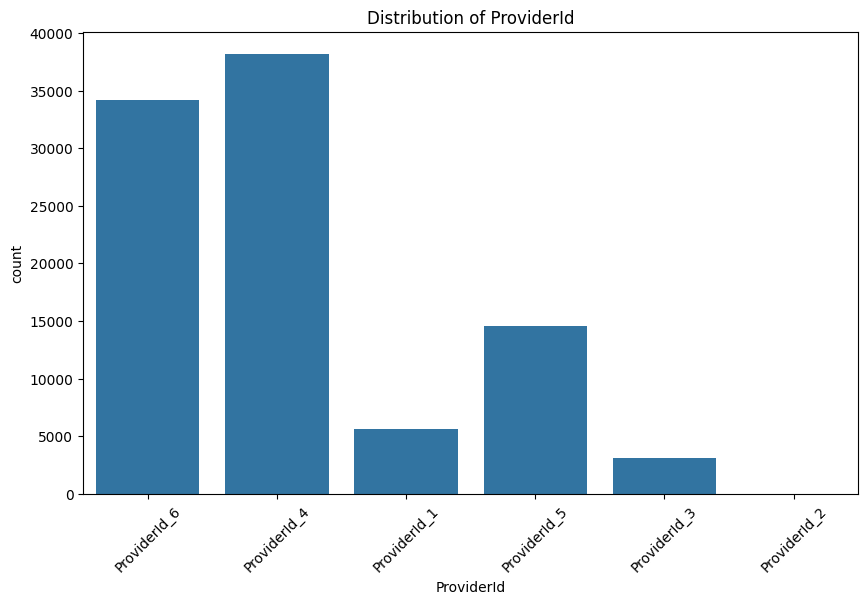

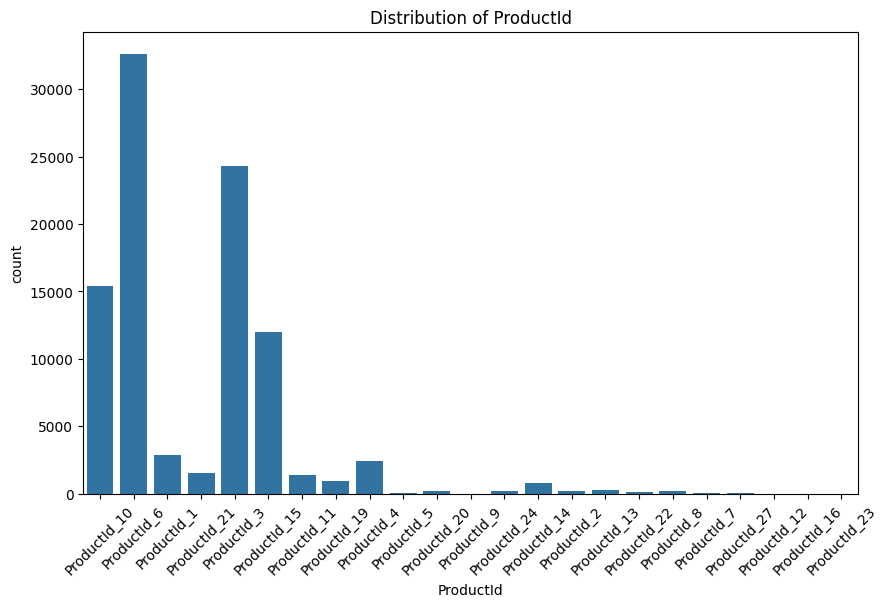

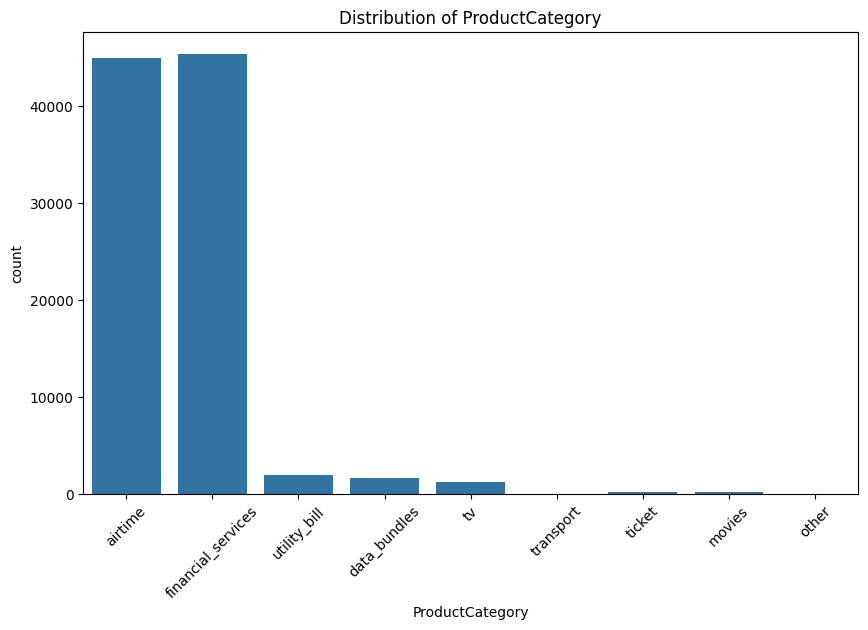

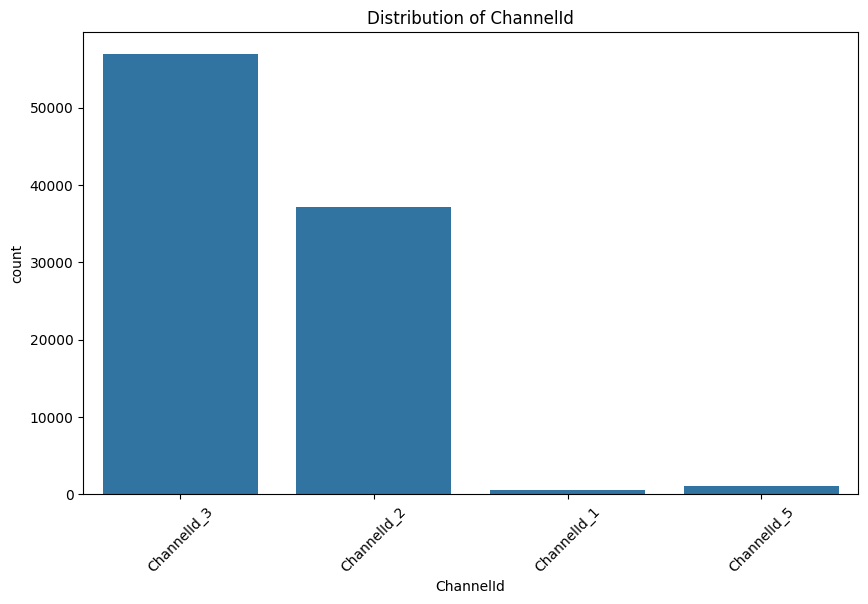

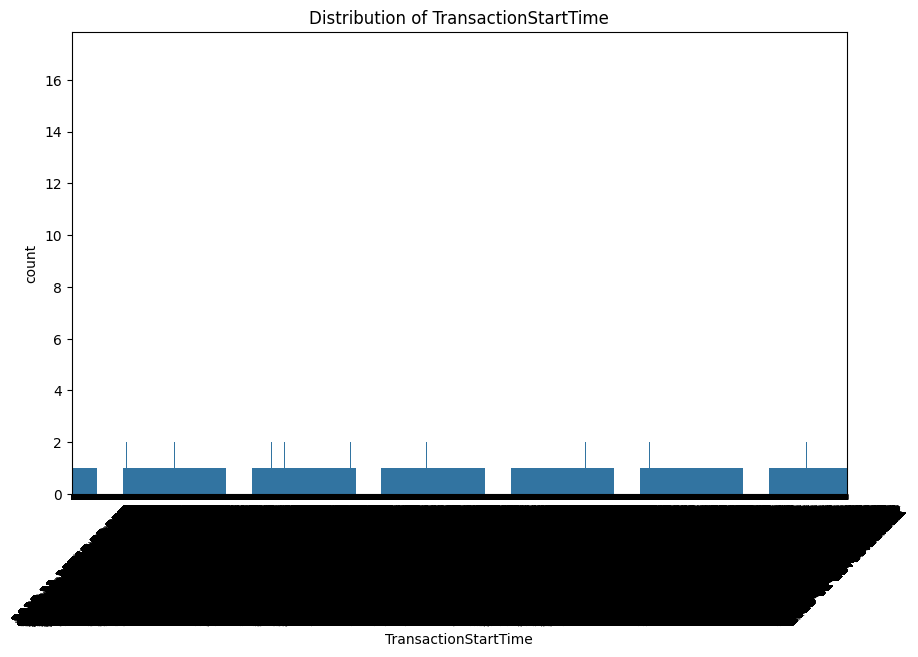

In [10]:
# 4. Distribution of Categorical Features
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

In [1]:
#Task 2 - Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset
df = pd.read_csv('../Data/data.csv')

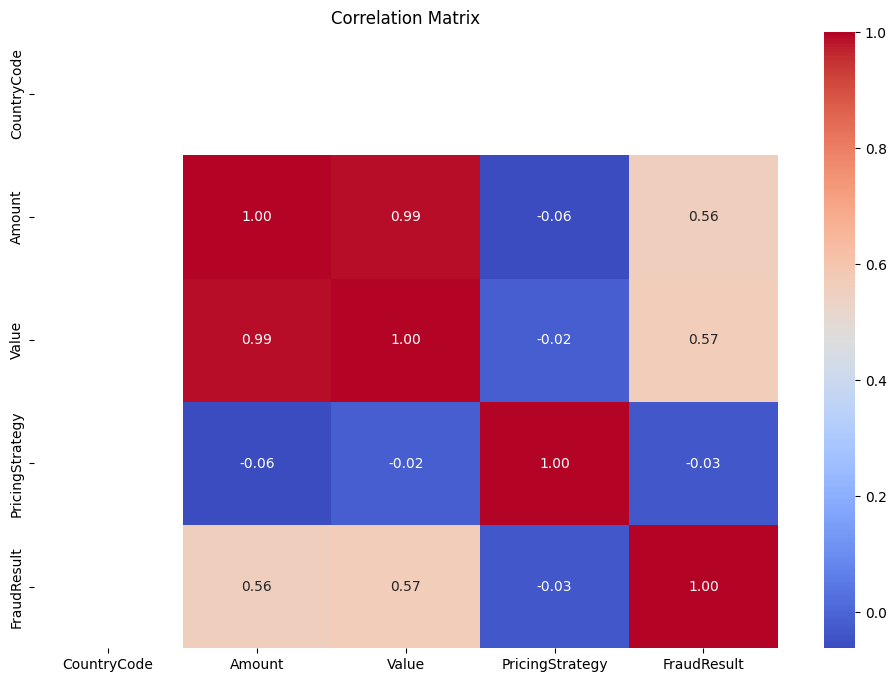

In [2]:
# 5. Correlation Analysis
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


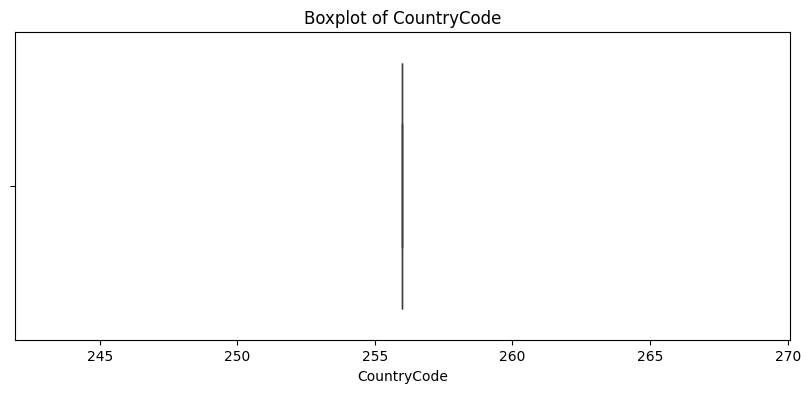

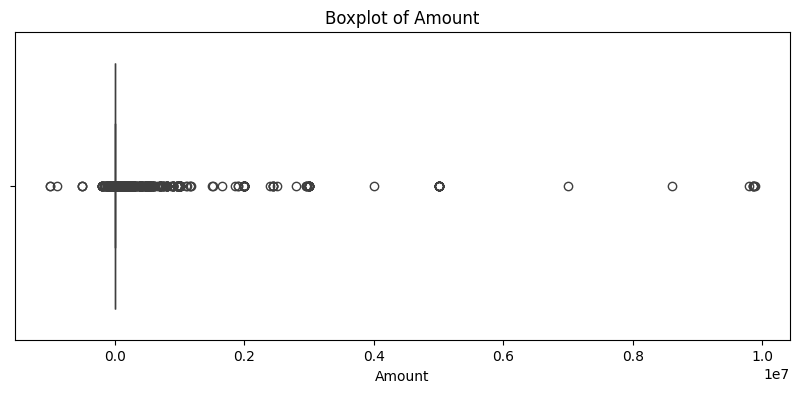

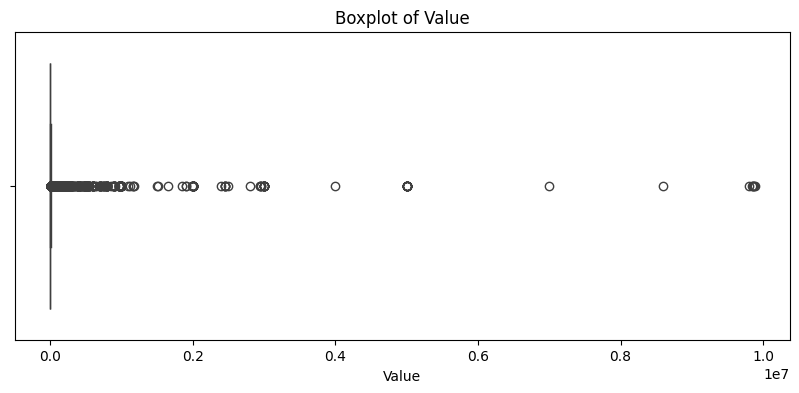

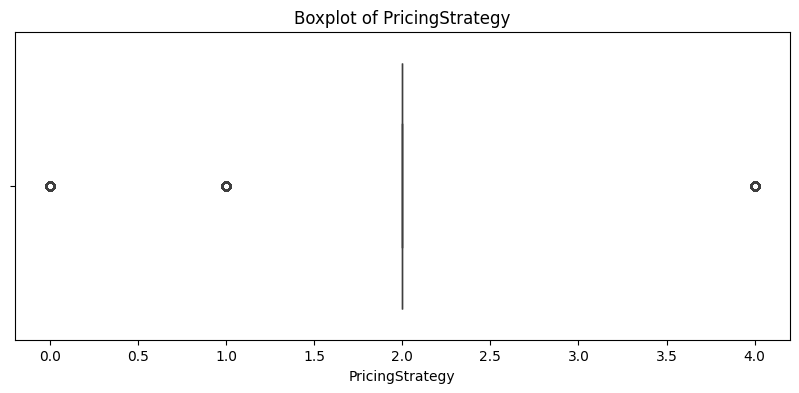

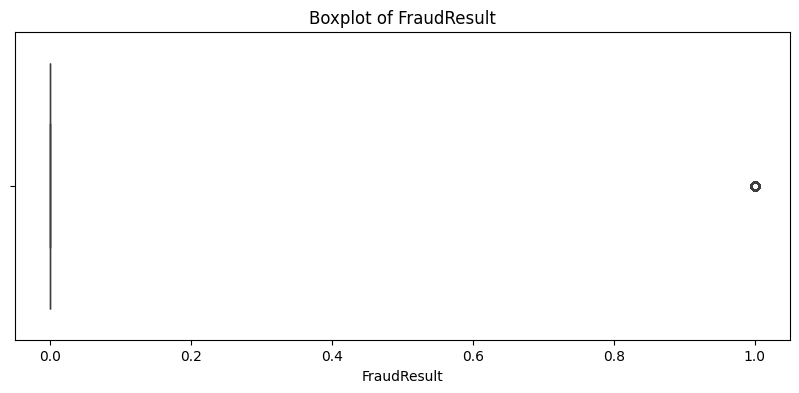

In [3]:
# 6. Identifying Missing Values
print(df.isnull().sum())

# 7. Outlier Detection using Box Plots
# Get numerical features from the DataFrame
numerical_features = df.select_dtypes(include=np.number).columns  # Define numerical_features here

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

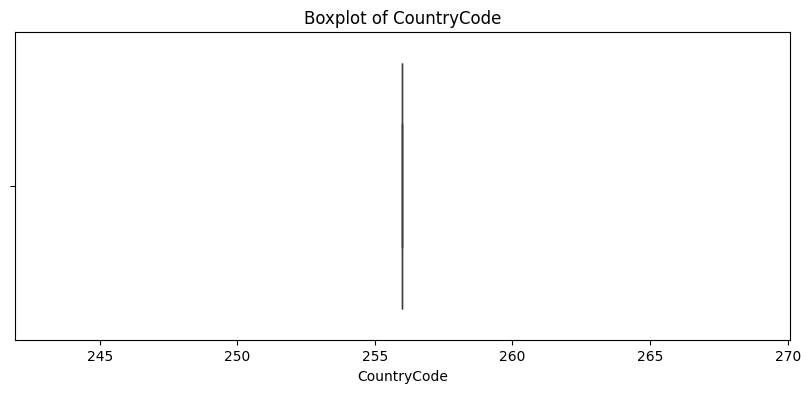

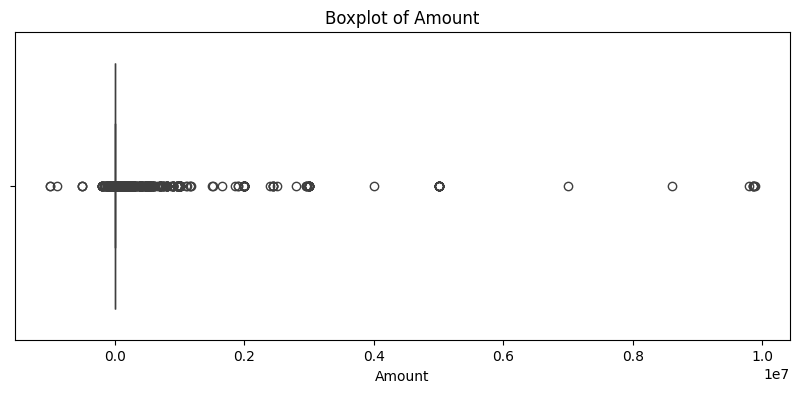

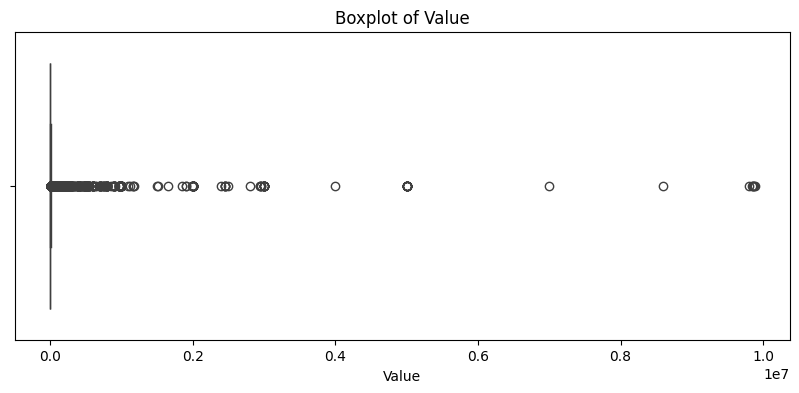

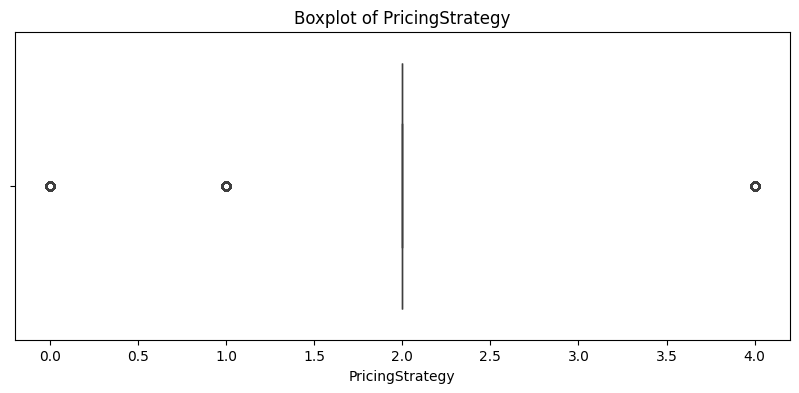

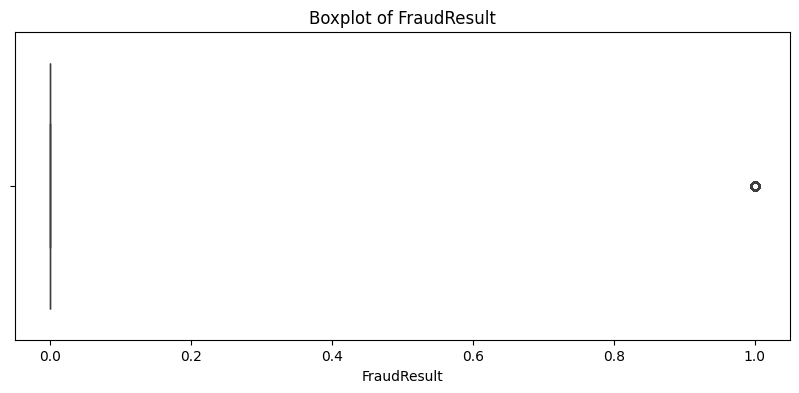

In [5]:
# 7. Outlier Detection
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [6]:
#Task 3 - Feature Engineering

# 1. Create Aggregate Features
df['Total_Transaction_Amount'] = df.groupby('CustomerId')['Amount'].transform('sum')
df['Average_Transaction_Amount'] = df.groupby('CustomerId')['Amount'].transform('mean')
df['Transaction_Count'] = df.groupby('CustomerId')['TransactionId'].transform('count')
df['Std_Dev_Transaction_Amount'] = df.groupby('CustomerId')['Amount'].transform('std')

# 2. Extract Features from TransactionStartTime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['Transaction_Hour'] = df['TransactionStartTime'].dt.hour
df['Transaction_Day'] = df['TransactionStartTime'].dt.day
df['Transaction_Month'] = df['TransactionStartTime'].dt.month
df['Transaction_Year'] = df['TransactionStartTime'].dt.year

# 3. Encode Categorical Variables
# Check if these columns exist in your DataFrame
categorical_features_list = ['ProductCategory', 'CurrencyCode', 'FraudResult', 'TransactionId'] 
# Only include 'MerchantName' if it's in the DataFrame's columns and hasn't been one-hot encoded yet
if 'MerchantName' in df.columns and 'MerchantName_1' not in df.columns:  # Check for one-hot encoded version
    categorical_features_list.append('MerchantName')

# Create a copy of the DataFrame for categorical features BEFORE one-hot encoding
categorical_features = df[categorical_features_list].copy() if all(col in df.columns for col in categorical_features_list) else pd.DataFrame()

# Now apply one-hot encoding to the original DataFrame, but only if the columns haven't been encoded already
columns_to_encode = [col for col in categorical_features.drop('TransactionId', axis=1, errors='ignore').columns if col in df.columns and f'{col}_1' not in df.columns]
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# 4. Handle Missing Values
# Impute numerical columns with mean, EXCLUDING non-numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  
# Alternatively, drop if few
df.dropna(inplace=True)

# 5. Normalize/Standardize Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Redefine numerical_features to include only the current numerical columns
numerical_features = df.select_dtypes(include=np.number).columns  
# Exclude the one-hot encoded and other engineered features
numerical_features = [f for f in numerical_features if f in ['CountryCode', 'Amount', 'Value']]  
# Now apply scaling 
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [18]:
#Task 3 - Default estimator and WoE binning
#Construct a default estimator (proxy): For simplicity, we will create RFMS scores.

def calculate_rfms(df):
    rfm = df.groupby('CustomerId').agg({
        'Amount': ['sum', 'count'],  # Total Revenue, Count of Orders
        'TransactionStartTime': lambda x: (pd.Timestamp.now().tz_localize(None) - x.max()).days  # Recency as days since last transaction
    })

    rfm.columns = ['Total_Spent', 'Total_Transactions', 'Recency']
    # Score assignment could be expanded based on business logic
    rfm['RFMS_Score'] = (rfm['Recency'] + rfm['Total_Spent'] + rfm['Total_Transactions']).mean()
    return rfm


    

In [19]:
def calculate_rfms(df):
    rfm = df.groupby('CustomerId').agg({
        'Amount': ['sum', 'count'],  # Total Revenue, Count of Orders
        'TransactionStartTime': lambda x: (pd.Timestamp.now().tz_localize(None) - x.max().tz_localize(None)).days  # Recency as days since last transaction, ensuring both are tz-naive
    })

    rfm.columns = ['Total_Spent', 'Total_Transactions', 'Recency']
    # Score assignment could be expanded based on business logic
    rfm['RFMS_Score'] = (rfm['Recency'] + rfm['Total_Spent'] + rfm['Total_Transactions']).mean()
    return rfm

rfms = calculate_rfms(df)
print(rfms)

                 Total_Spent  Total_Transactions  Recency   RFMS_Score
CustomerId                                                            
CustomerId_1       -0.135580                   1     2258  2230.477552
CustomerId_10      -0.135580                   1     2258  2230.477552
CustomerId_1001    -0.110207                   5     2263  2230.477552
CustomerId_1002    -0.565027                  11     2200  2230.477552
CustomerId_1003    -0.164688                   6     2186  2230.477552
...                      ...                 ...      ...          ...
CustomerId_992     -0.164688                   6     2179  2230.477552
CustomerId_993     -0.110207                   5     2200  2230.477552
CustomerId_994     -1.091831                 101     2175  2230.477552
CustomerId_996      0.201098                  17     2242  2230.477552
CustomerId_998     -0.387593                  22     2174  2230.477552

[3742 rows x 4 columns]


In [20]:
#WoE Binning
#To perform Weight of Evidence (WoE) binning, use a library or apply manually:

#pip install category_encoders
from category_encoders import WOEEncoder

# Assuming 'FraudResult' was your target variable and was one-hot encoded
# Find the one-hot encoded column related to 'FraudResult'
fraud_result_col = [col for col in df.columns if col.startswith('FraudResult_')]

# Check if 'FraudResult' was one-hot encoded
if fraud_result_col:
    # Use the one-hot encoded column for the target
    target_column = fraud_result_col[0] 
else:
    # If not one-hot encoded, check if it still exists
    if 'FraudResult' in df.columns:
        target_column = 'FraudResult'
    else:
        # If 'FraudResult' doesn't exist, provide feedback and handle appropriately
        raise KeyError("The 'FraudResult' column is not found in the DataFrame. Please check your data and preprocessing steps.")

# Find the one-hot encoded columns related to 'ProductCategory'
product_category_cols = [col for col in df.columns if col.startswith('ProductCategory_')]

# If there are one-hot encoded columns, use them for WOE encoding
if product_category_cols:
    woe = WOEEncoder(cols=product_category_cols)  
    # Use the target_column for fitting
    woe_bin = woe.fit_transform(df[product_category_cols], df[target_column])
    # Create a new column for the combined WOE values
    df['Binned_Feature'] = woe_bin.sum(axis=1)  
else:
    # If 'ProductCategory' still exists as a single column, use the original code
    woe = WOEEncoder(cols=['ProductCategory']) 
    # Use the target_column for fitting 
    woe_bin = woe.fit_transform(df['ProductCategory'], df[target_column])
    df['Binned_Feature'] = woe_bin

In [12]:
#Task 4 - Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Splitting the Data
# Assuming 'FraudResult' was one-hot encoded as 'FraudResult_1'
# Adjust this if the encoded column has a different name
# Drop 'TransactionId' and all columns starting with 'BatchId'
X = df.drop(['FraudResult_1', 'TransactionId'] + [col for col in df.columns if col.startswith('BatchId')], axis=1) 

# If you need the original 'FraudResult' values for 'y', you'll need to
# reconstruct them from the one-hot encoded columns if they were encoded.
# For example, if 'FraudResult_1' represents the positive class:
y = df['FraudResult_1'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Handle Missing Values
# Impute numerical columns with mean, EXCLUDING non-numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  
# Alternatively, drop if few
df.dropna(inplace=True)

# ----> Convert all columns to numeric before model fitting
X = X.apply(pd.to_numeric, errors='coerce').fillna(0) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (Random Forest and Logistic Regression)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation Metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
    print("\n")
    
# Example Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Model: Logistic Regression
Accuracy: 0.9981184341190613
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5




c:\Users\HP\Desktop\10 Acadamy\AIM Week-6\AIM_WEEK_6\BatiBank\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Random Forest
Accuracy: 0.99989546856217
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1 Score: 0.9722222222222222
ROC AUC: 0.9860849289882647


Best parameters found:  {'max_depth': 10, 'n_estimators': 50}


In [12]:
from flask import Flask, request, jsonify
import joblib
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# Create a Flask app
app = Flask(__name__)

try:
    # Attempt to load the model
    model = joblib.load('random_forest_model.pkl') 
except FileNotFoundError:
    # If the file is not found, create a new model and save it
    print("Model file not found. Creating and saving a new model...")
    model = RandomForestClassifier()  # Initialize a new model
    # Assuming you have X_train and y_train from your previous code
    model.fit(X_train, y_train) # Train the model if it's not already trained
    joblib.dump(model, 'random_forest_model.pkl')  # Save the model
    print("New model saved as random_forest_model.pkl")

# Load the trained model
model = joblib.load('random_forest_model.pkl')  # Save your model after training

@app.route('/predict', methods=['POST'])
def predict():
    # Receive JSON data
    data = request.json
    data_df = pd.DataFrame(data, index=[0])  # Convert the request to DataFrame
    
    # Encode categorical features
    for col in categorical_features.drop('TransactionId'):
        if col in data_df.columns:
            category_data = data_df[col].values[0]
            # Encode the same way as training
            data_df[col] = le.transform([category_data])
    
    # Make prediction
    prediction = model.predict(data_df)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)

Model file not found. Creating and saving a new model...
New model saved as random_forest_model.pkl
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\Users\HP\Desktop\10 Acadamy\AIM Week-6\AIM_WEEK_6\BatiBank\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
